# <center> <span style='color:Blue'>---LAB-2: Filtering---</span> <center>

<span style='color:Magenta'>I-FIR Delay effect</span>
=======

The FIR filter for delay effect can be implement thanks to the following input-output equation ($e[t]$ is the input, $s[t]$ is the output):
### $$ S[t] = e[t] + \alpha e[t-D]$$
<li>$\alpha \ge 0 $ is the attenuation factor</li>
<li>D the time delay</li>

### Transfert function $H(z)$
### $$ S[z] = E[Z] + \alpha z^{-D}E[z]$$
### $$ S[z] = (1 + \alpha z^{-D})E[z]$$
### $$ H[z]=\frac{S[z]}{E[z]} = 1 + \alpha z^{-D}$$
the region of convergence is $∣z∣\neq0$, the filter being a-causal.

### Impulse response 
The impulse response is obtained simply by inversion of the z-transform, using the table and the time shift properties, or by using the Dirac as the input ($e[t]=\delta[t]$): 

### $$h[t]=\delta[t]+\alpha \delta[t-D]$$

# <span style='color:Red'>1 - Import libraries and audio</span>

Used libraries:
[librosa](https://librosa.org/doc/latest/index.html), [numpy](https://numpy.org/), [ipython](https://ipython.org/), [scipy](https://www.scipy.org/),[matplotlib](https://matplotlib.org/)

In [1]:
%matplotlib inline
import librosa
from IPython.display import Audio
import scipy
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 12})

In [4]:
alpha =0.5 #alpha is the attenuation factor
echo_duration=0.1
D=1 # the time delay

file_path = "audios/110_Am_ArpRonroco_01_714.wav" # import audio
samples , sampling_rate = librosa.load(file_path, sr=None, mono = True, 
                                                  offset = 0.0, duration = None)
print("Audio",[len(samples),sampling_rate])



Audio [384873, 44100]


In [5]:
duration_of_sound = len(samples)/sampling_rate
 
print(duration_of_sound,"s")

8.727278911564627 s


In [6]:
print("Original audio")
Audio(file_path)

Original audio


# <span style='color:Red'>2 - Visualizing Audio </span>

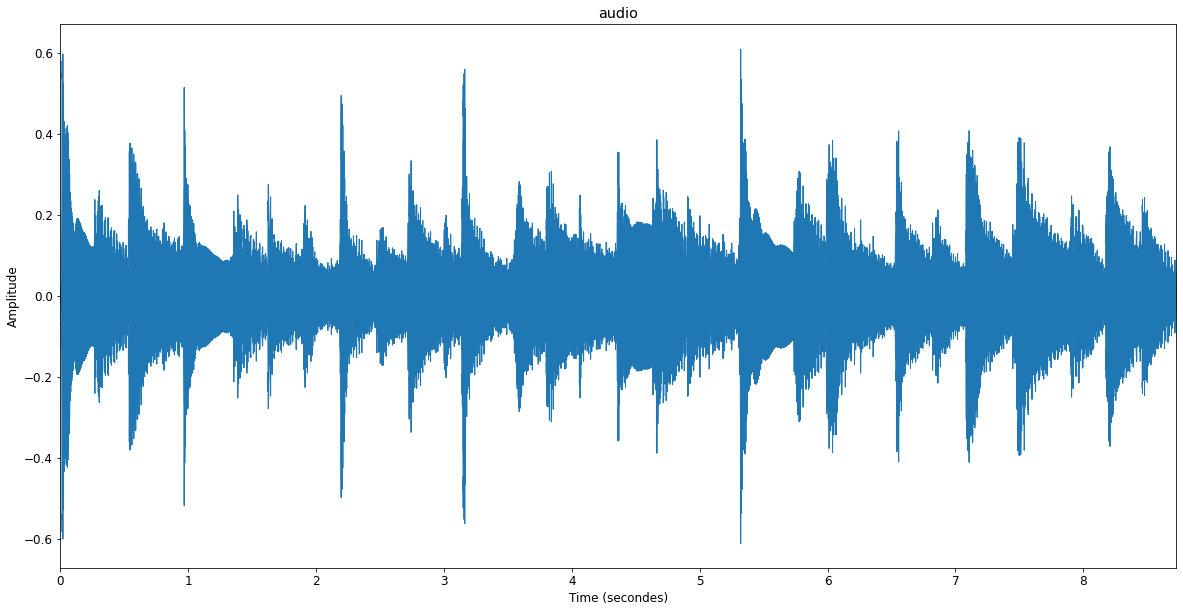

In [7]:
    librosa.display.waveplot(y = samples, sr = sampling_rate) 
    plt.xlabel("Time (secondes)")
    plt.ylabel("Amplitude")
    plt.title("audio") 
plt.show()

# <span style='color:Red'>3 -Implementation of the delay effect in the time domain </span>

In this part we realize the delay effect in the time domain. This is achieved by concatenating two vectors, one containing the samples of the audio and the other a null vector of the length of the delay.

In [8]:
delay_len_samples=round(echo_duration*sampling_rate) # Determine the length of the delay
zeros_sig = np.zeros(delay_len_samples)

In [9]:

delayed_sig = np.concatenate((zeros_sig,alpha*samples))
sig = np.concatenate((samples,zeros_sig))
summed_sig = sig + D*delayed_sig


In [10]:
import soundfile as sf
sf.write('audios/output_1.wav', summed_sig, sampling_rate, 'PCM_24')

In [12]:
file_path_1 = "audios/output_1.wav"
output_1 , sampling_rate_1 = librosa.load(file_path_1, sr=None, mono = True, 
                                                  offset = 0.0, duration = None)
print("Audio",[len(output_1),sampling_rate_1])

Audio [389283, 44100]


In [13]:
print("Audio")
Audio(file_path_1)

Audio


the delay effect is achieved with D=0.5 and $\alpha = 0.5$

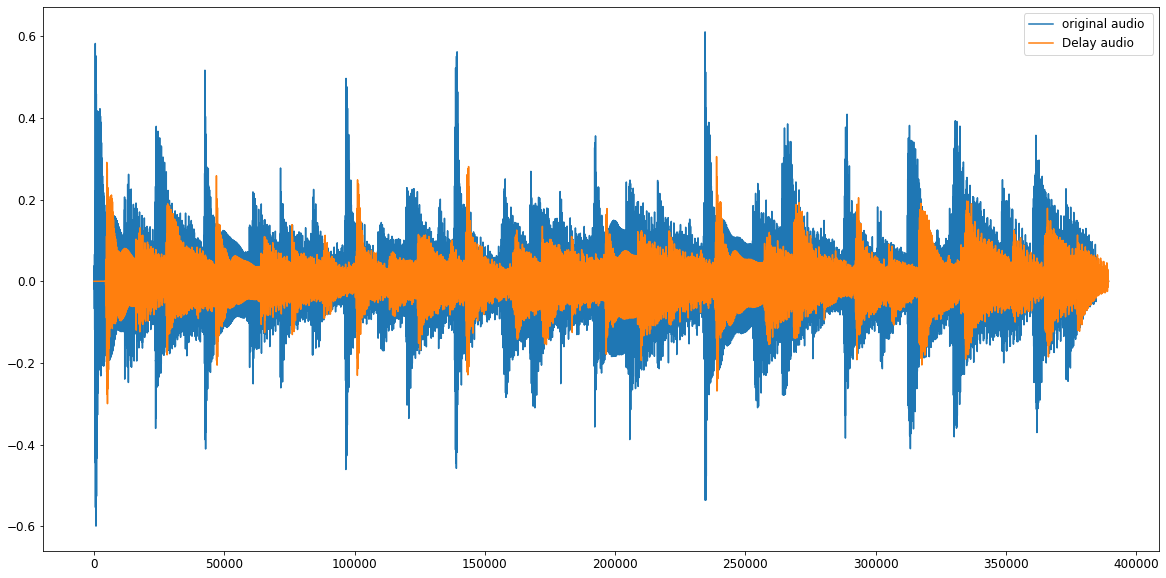

In [14]:
plt.figure()
plt.plot(sig, label='original audio ')

plt.plot(delayed_sig,label='Delay audio')
plt.legend()

# <span style='color:Red'>3 -FIR delay effects using convolution </span>

In [18]:
impulse_response = np.zeros(delay_len_samples)


impulse_response[-1]= alpha
output_2 = np.convolve(samples,impulse_response )


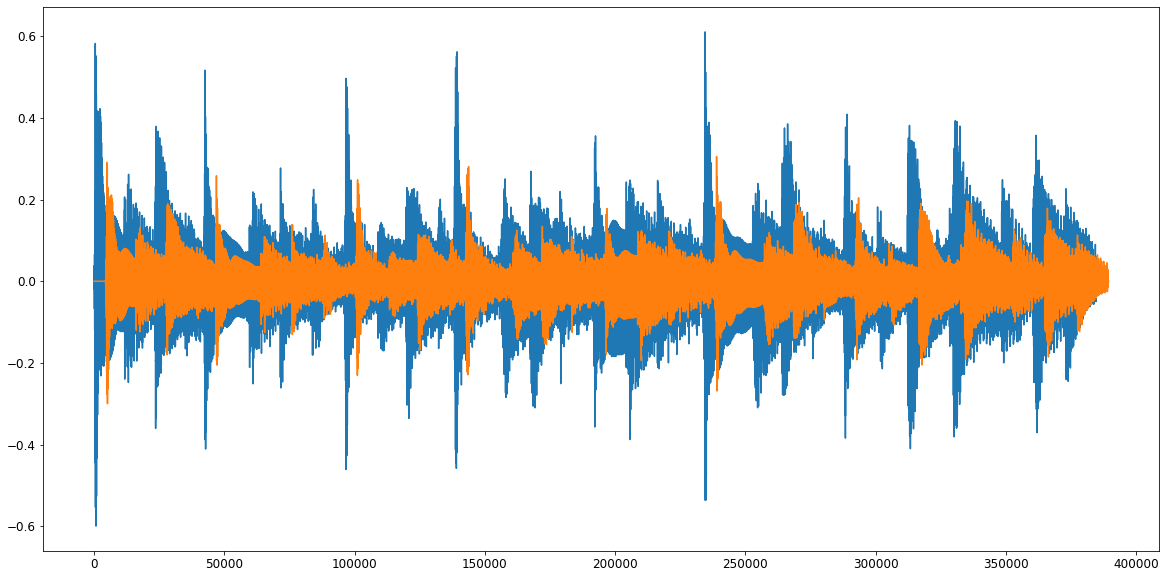

In [19]:
plt.figure()
plt.plot(samples)
plt.plot(output_2)

We get the same result as the first method

In [20]:
sf.write('audios/output_2.wav', output_2, sampling_rate, 'PCM_24')

In [21]:
file_path_2 = "audios/output_2.wav"
output_2 , sampling_rate_2 = librosa.load(file_path_2, sr=None, mono = True, 
                                                  offset = 0.0, duration = None)
print("Audio",[len(output_2),sampling_rate_1])

Audio [389282, 44100]


In [22]:
print("Audio")
Audio(file_path_2)

Audio


<span style='color:Magenta'>II-IIR Delay effect</span>
=======

The IIR filter for delay effect can be implement thanks to the following input-output equation (e[t] is the input, s[t] is the output): 
### $$ S[t] = \alpha e[t]+\beta s[t−D]$$
<li>$\alpha \ge 0 $  is the scaling factor </li>
<li>$\beta \ge 0$ is the attenuation factor</li>
<li>$D \ge 0$ is the time delay</li>

### Transfert function $H(z)$
### $$ S[z] = \alpha E[Z] + \beta z^{-D}S[z]$$
### $$ (1-\beta z^{-D})S[z] = \alpha E[Z]$$
### $$ H[z]=\frac{S[z]}{E[z]} = \frac{ \alpha}{1-\beta z^{-D}}$$
for D=1 
### $$ H[z]=\frac{S[z]}{E[z]} = \frac{ \alpha}{1-\beta z^{-1}}$$
### $$ H[z]=\frac{S[z]}{E[z]} = \frac{ \alpha z}{z-\beta}$$

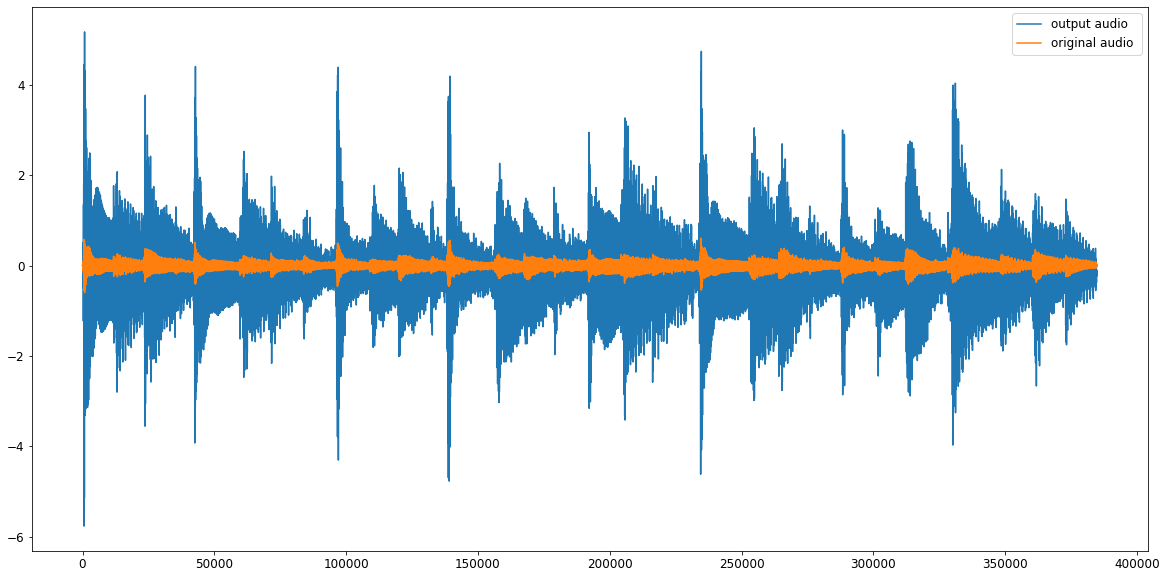

In [23]:
import scipy
import scipy.signal as sig


alpha=0.5
# Input signal.
x = samples
beta = 1
# Filter coefficients.
a=np.zeros(D+1)
a[0] = 1
a[1]= -beta

y = sig.lfilter([alpha], a, x)

plt.figure()
plt.plot(y,label='output audio')
plt.plot(samples, label='original audio ')
plt.legend()


In [239]:
sf.write('audios/output_3.wav', y, sampling_rate, 'PCM_24')

In [24]:
file_path_3 = "audios/output_3.wav"
output_3 , sampling_rate_2 = librosa.load(file_path_3, sr=None, mono = True, 
                                                  offset = 0.0, duration = None)
print("Audio",[len(output_3),sampling_rate_1])

Audio [384873, 44100]


In [25]:
print("Audio")
Audio(file_path_3)

Audio
